In [41]:
import pandas as pd
from sklearn.datasets import load_iris

In [42]:
data = load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [43]:
df = pd.DataFrame(data.data, columns= data['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
df['target'] = data.target

In [45]:
df['flower']= df['target']

In [46]:
df.flower.replace([0,1,2],['setosa','versicolor','verginica'], inplace= True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,verginica
146,6.3,2.5,5.0,1.9,2,verginica
147,6.5,3.0,5.2,2.0,2,verginica
148,6.2,3.4,5.4,2.3,2,verginica


In [47]:
setosa = df[df['target']==0]
versicolor = df[df['target']==1]
verginica = df[df['target']==2]

In [48]:
categorical_features = df.drop(['target','flower', 'petal length (cm)', 'petal width (cm)'], axis=1)
target = df.target

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(categorical_features, target, test_size=.2, random_state= 1)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.8666666666666667

In [51]:
from sklearn.metrics import confusion_matrix

y_pred= knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

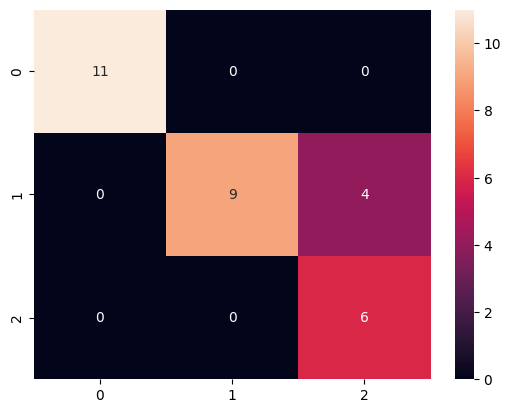

In [52]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.heatmap(cm, annot= True)
plt.show()

In [53]:
from sklearn. metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.69      0.82        13
           2       0.60      1.00      0.75         6

    accuracy                           0.87        30
   macro avg       0.87      0.90      0.86        30
weighted avg       0.92      0.87      0.87        30

